# Recommendation Systems Project

## Author: Saumya Kothari

#### DOMAIN:
Smartphone, Electronics

#### CONTEXT: 
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

#### DATA DESCRIPTION:
- author : name of the person who gave the rating
- country : country the person who gave the rating belongs to
- data : date of the rating
- domain: website from which the rating was taken from
- extract: rating content
- language: language in which the rating was given
- product: name of the product/mobile phone for which the rating was given
- score: average rating for the phone
- score_max: highest rating given for the phone
- source: source from where the rating was taken

#### PROJECT OBJECTIVE: 
We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

#### Steps and tasks: [ Total Score: 60 points]
1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.
• Merge the provided CSVs into one data-frame.
• Check a few observations and shape of the data-frame.
• Round off scores to the nearest integers.
• Check for missing values. Impute the missing values if there is any.
• Check for duplicate values and remove them if there is any.
• Keep only 1000000 data samples. Use random state=612.
• Drop irrelevant features. Keep features like Author, Product, and Score.
2. Answer the following questions
• Identify the most rated features.
• Identify the users with most number of reviews.
• Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset.
3. Build a popularity based model and recommend top 5 mobile phones.
4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you
can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You
can try both user-based and item-based model.
5. Evaluate the collaborative model. Print RMSE value.
6. Predict score (average rating) for test users.
7. Report your findings and inferences.
8. Try and recommend top 5 products for test users.
9. Check for outliers and impute them as required.
10. Try cross validation techniques to get better results.
11. In what business scenario you should use popularity based Recommendation Systems ?
12. In what business scenario you should use CF based Recommendation Systems ?
13. What other possible methods can you think of which can further improve the recommendation for different users ?


### Importing Necessary Libraries

In [1]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
import gc
%matplotlib inline

# Surprise package for making recommendation
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import GridSearchCV, cross_validate, KFold
from surprise import accuracy, Reader, Dataset, dump

# For Sklearn NearestNeighbor based recommendation
from sklearn.metrics import pairwise_distances, mean_squared_error
from scipy.spatial.distance import correlation, cosine
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import sklearn.metrics as metrics
from math import sqrt

# Display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 20
pd.options.display.float_format = "{:.2f}".format

random_state = 612
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

##### Reading data frames and combining

In [2]:
df1 = pd.read_csv('phone_user_review_file_1.csv', encoding='latin1')
df2 = pd.read_csv('phone_user_review_file_2.csv', encoding='latin1')
df3 = pd.read_csv('phone_user_review_file_3.csv', encoding='latin1')
df4 = pd.read_csv('phone_user_review_file_4.csv', encoding='latin1')
df5 = pd.read_csv('phone_user_review_file_5.csv', encoding='latin1')
df6 = pd.read_csv('phone_user_review_file_6.csv', encoding='latin1')

In [3]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.00,10.00,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.20,10.00,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.00,10.00,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
df2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.00,10.00,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.00,10.00,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.00,10.00,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.00,10.00,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.00,10.00,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
print("Dataframe 1 - Shape: ", df1.shape)
print("Dataframe 2 - Shape: ", df2.shape)
print("Dataframe 3 - Shape: ", df3.shape)
print("Dataframe 4 - Shape: ", df4.shape)
print("Dataframe 5 - Shape: ", df5.shape)
print("Dataframe 6 - Shape: ", df6.shape)

Dataframe 1 - Shape:  (374910, 11)
Dataframe 2 - Shape:  (114925, 11)
Dataframe 3 - Shape:  (312961, 11)
Dataframe 4 - Shape:  (98284, 11)
Dataframe 5 - Shape:  (350216, 11)
Dataframe 6 - Shape:  (163837, 11)


##### Combining all data frames

In [6]:
frames = [df1, df2, df3, df4, df5, df6]

In [7]:
data_join = pd.concat(frames)
data_join.shape

(1415133, 11)

In [8]:
data_join.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.00,10.00,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.20,10.00,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.00,10.00,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### Data Analysis & Fixing Missing Values

In [9]:
# Checking information of data provided
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [10]:
# Chceking numerical data of scores provided as they are the only numeric data type
data_join.describe()

,score,score_max
count,1351644.00,1351644.00
mean,8.01,10.00
std,2.62,0.00
min,0.20,10.00
25%,7.20,10.00
50%,9.20,10.00
75%,10.00,10.00
max,10.00,10.00


#### Round off scores to nearest integer:

In [11]:
import math

data_join['score'] = data_join['score'].round()

In [12]:
data_join.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.00,10.00,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.00,10.00,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.00,10.00,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


#### Checking for Missing Values:

In [13]:
# Check if there any null values in the dataframe
ratings = data_join
ratings.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [14]:
# We have decided to drop those columns with no score values since those fields would not be of any help

ratings['score_max'].fillna(10.0, inplace = True)
ratings = ratings.dropna()

In [15]:
ratings.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [16]:
ratings.shape

(1275917, 11)

#### Checking for duplicated values 

In [17]:
# Check if there are any duplicate rows
ratings[ratings.duplicated(keep = 'first')]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.00,10.00,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.00,10.00,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.00,10.00,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.00,10.00,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.00,10.00,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
143802,/cellphones/nokia-6310i/,5/3/2014,ru,ru,Yandex,market.yandex.ru,10.00,10.00,Ð¢ÐµÐ»ÐµÑÐ¾Ð½Ð¾Ð¼ Ð¿Ð¾Ð»ÑÐ·Ð¾Ð²Ð°Ð»ÑÑ Ð´Ð°...,ÐÐ¸ÐºÐ±Ð°ÐµÐ² ÐÐ¹Ð±ÑÐ»Ð°Ñ,Nokia 6310i
143913,/cellphones/nokia-6310i/,7/22/2011,ru,ru,Yandex,market.yandex.ru,10.00,10.00,ÐÑÐµÐ½Ñ Ð¶Ð°Ð»ÐµÑ Ð¾Ð± ÑÑÑÐ°ÑÐµ ÑÑÐ¾...,alienwarfiend,Nokia 6310i
143959,/cellphones/nokia-6310i/,11/19/2009,ru,ru,Yandex,market.yandex.ru,10.00,10.00,"Ð£ Ð¼ÐµÐ½Ñ ""NOKIA 6310i"" ÑÐ¶Ðµ Ð±Ð¾Ð»ÐµÐµ 3-...",Yurigin70,Nokia 6310i
146824,/cellphones/nokia-8850/,8/23/2014,ru,ru,Yandex,market.yandex.ru,10.00,10.00,ÐÐ°Ð½Ð½ÑÐ¹ Ð¾ÑÐ·ÑÐ² Ð½Ð°Ð¿Ð¸ÑÐ°Ð½ Ð»Ð¸ÑÑ...,ÐÐ²Ð°Ð½Ð¾Ð² ÐÐµÐ½Ð¸Ñ,Nokia 8850


In [18]:
ratings_without_duplicates = ratings.drop_duplicates()

In [19]:
ratings_without_duplicates

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.00,10.00,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.00,10.00,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.00,10.00,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
163832,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.00,10.00,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
163833,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.00,10.00,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
163834,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.00,10.00,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
163835,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.00,10.00,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy


##### Keeping only 1,000,000 entries in dataset:

In [20]:
# Since original shape was 1271437 x 11, we removed the last 271437 rows

data = ratings_without_duplicates.head(-271437) 
  
# Printing dataframe 
data

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.00,10.00,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.00,10.00,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.00,10.00,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
183291,/cellphones/samsung-genoa-c3510/,7/13/2016,en,in,91 Mobiles,91mobiles.com,8.00,10.00,the phone specifications are pretty fine for t...,karthikeyan,Samsung C3510 Genoa
183292,/cellphones/samsung-genoa-c3510/,7/13/2016,en,in,91 Mobiles,91mobiles.com,10.00,10.00,Hy i am exploring a new gift from samsung gian...,akhilesh,Samsung C3510 Genoa
183293,/cellphones/samsung-genoa-c3510/,3/14/2011,en,us,Phone Arena,phonearena.com,7.00,10.00,Please help me out with this Samsung phone.. i...,Livy,Samsung C3510
183294,/cellphones/samsung-genoa-c3510/,1/30/2011,en,us,Phone Arena,phonearena.com,9.00,10.00,Its a good touch screen phone at a cheap price...,David mao,Samsung C3510


##### Removing not essential columns:

In [21]:
rec = data

del rec['phone_url']
del rec['lang']
del rec['score_max']
del rec['extract']

In [22]:
rec.head()

,date,country,source,domain,score,author,product
0,5/2/2017,us,Verizon Wireless,verizonwireless.com,10.00,CarolAnn35,Samsung Galaxy S8
1,4/28/2017,us,Phone Arena,phonearena.com,10.00,james0923,Samsung Galaxy S8
2,5/4/2017,us,Amazon,amazon.com,6.00,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,5/2/2017,us,Samsung,samsung.com,9.00,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,5/11/2017,us,Verizon Wireless,verizonwireless.com,4.00,S Ate Mine,Samsung Galaxy S8


#### Descriptive Statistic:

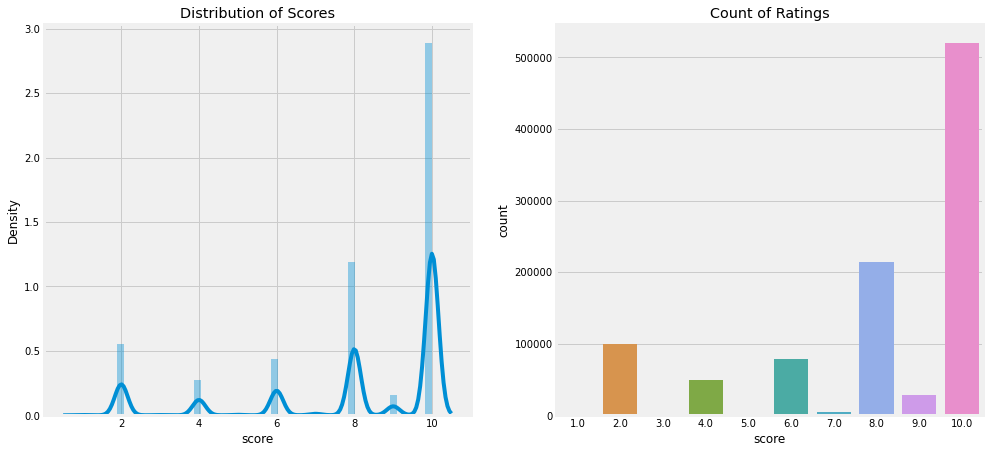

In [23]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
g = sns.distplot(rec['score'], ax = ax).set_title('Distribution of Scores')
ax = fig.add_subplot(122)
g = sns.countplot(rec['score']).set_title('Count of Ratings')

#### Identifying user with most reviews and essential details:

In [24]:
print('Adding a column with count of score per user'); print('--'*40)
userid = rec['author'].value_counts()
userid = pd.DataFrame(userid).reset_index()
userid.columns = ['author', 'AuthorCounts']

ratings_df = rec.merge(userid, how = 'left', on = ['author'])
display(ratings_df.shape, ratings_df.head())

Adding a column with count of score per user
--------------------------------------------------------------------------------


(1000000, 8)

,date,country,source,domain,score,author,product,AuthorCounts
0,5/2/2017,us,Verizon Wireless,verizonwireless.com,10.00,CarolAnn35,Samsung Galaxy S8,1
1,4/28/2017,us,Phone Arena,phonearena.com,10.00,james0923,Samsung Galaxy S8,1
2,5/4/2017,us,Amazon,amazon.com,6.00,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",1
3,5/2/2017,us,Samsung,samsung.com,9.00,Buster2020,Samsung Galaxy S8 64GB (AT&T),1
4,5/11/2017,us,Verizon Wireless,verizonwireless.com,4.00,S Ate Mine,Samsung Galaxy S8,1


In [25]:
# Number of unique user id and product id in the data
print('Number of unique USERS and PRODUCT in the raw ratings dataframe'); print('--'*40)
print('Number of unique USERS in raw ratings dataframe = ', ratings_df['author'].nunique())
print('Number of unique PRODUCTS in raw ratings dataframe = ', ratings_df['product'].nunique())

Number of unique USERS and PRODUCT in the raw ratings dataframe
--------------------------------------------------------------------------------
Number of unique USERS in raw ratings dataframe =  586839
Number of unique PRODUCTS in raw ratings dataframe =  41500


Distribution of Scores per User is sparser
Maximum number of score per user being 74425 and minimum being 1
--------------------------------------------------------------------------------


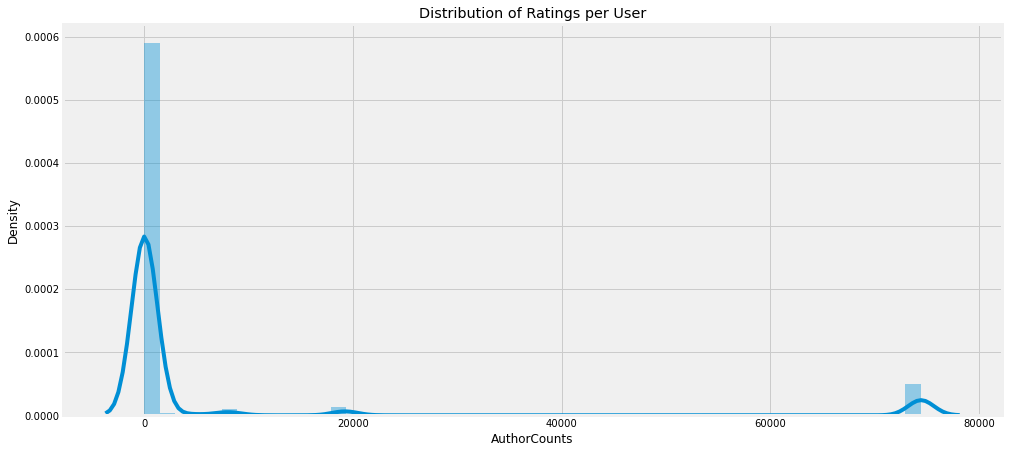

In [26]:
print('Distribution of Scores per User is sparser')
print('Maximum number of score per user being {maxm} and minimum being {minm}'.format(maxm = ratings_df['AuthorCounts'].max(), 
                                                                                       minm = ratings_df['AuthorCounts'].min()))
print('--'*40)
fig = plt.figure(figsize = (15, 7.2))
g = sns.distplot(ratings_df['AuthorCounts'], bins = 50).set_title('Distribution of Ratings per User')

del fig, g

In [27]:
print('Taking a subset of dataset to make it less sparse/denser')
print('Keeping users those who have given more than 49 number of ratings'); print('--'*40)

ratings_df = ratings_df[ratings_df['AuthorCounts'] >= 50]
print('Number of rows after filtering: {}'.format(ratings_df.shape[0]))

Taking a subset of dataset to make it less sparse/denser
Keeping users those who have given more than 49 number of ratings
--------------------------------------------------------------------------------
Number of rows after filtering: 211305


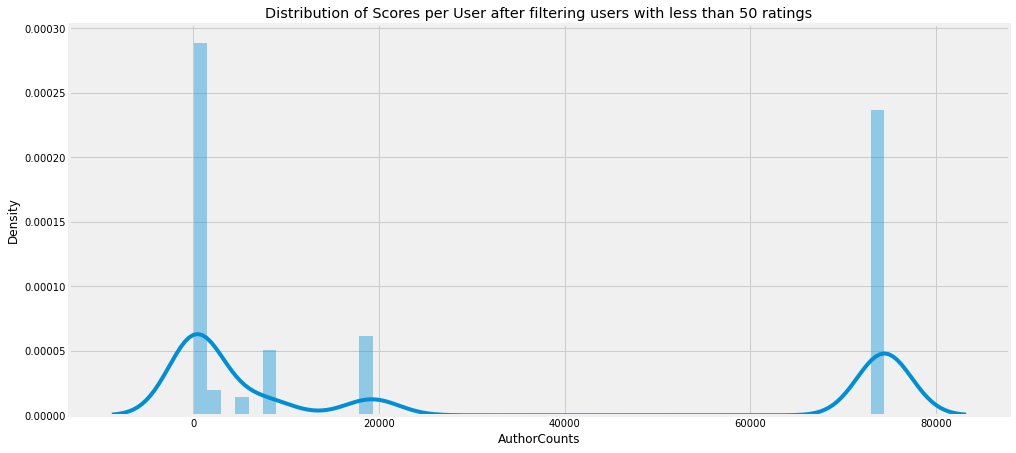

In [28]:
fig = plt.figure(figsize = (15, 7.2))
g = sns.distplot(ratings_df['AuthorCounts'], bins = 50).set_title('Distribution of Scores per User after filtering users with less than 50 ratings')

del fig, g

In [29]:
print('Number of product ids after filtering based on ratings/scores given by users: {}'.format(ratings_df['product'].nunique()))

Number of product ids after filtering based on ratings/scores given by users: 21782


In [30]:
ratings_df.shape

(211305, 8)

In [31]:
print('Selecting only Uauthor, product and \'score\' column'); print('--'*40)
ratings = ratings_df[['author', 'product', 'score']]

Selecting only Uauthor, product and 'score' column
--------------------------------------------------------------------------------


In [32]:
# Number of unique user id and product id in the data
print('Number of unique USERS and PRODUCTS in the filtered ratings dataframe'); print('--'*40)
print('Number of unique USERS in filtered ratings dataframe = ', ratings['author'].nunique())
print('Number of unique PRODUCTS in filtered ratings dataframe = ', ratings['product'].nunique())

Number of unique USERS and PRODUCTS in the filtered ratings dataframe
--------------------------------------------------------------------------------
Number of unique USERS in filtered ratings dataframe =  712
Number of unique PRODUCTS in filtered ratings dataframe =  21782


In [33]:
# Top and bottom 10 users based on # of ratings given
print('Top 10 users based on # of ratings given'); print('--'*40)
most_rated = ratings.groupby('author').size().sort_values(ascending = False)[:10]
display(most_rated)

print('\nBottom 10 users based on # of ratings given'); print('--'*40)
least_rated = ratings.groupby('author').size().sort_values(ascending = True)[:10]
display(least_rated)

del most_rated, least_rated

Top 10 users based on # of ratings given
--------------------------------------------------------------------------------


author
Amazon Customer    74425
Cliente Amazon     19236
e-bit               8381
Client d'Amazon     7649
Amazon Kunde        4555
einer Kundin        2610
einem Kunden        1898
unknown             1700
Anonymous           1458
Anonymous           1020
dtype: int64


Bottom 10 users based on # of ratings given
--------------------------------------------------------------------------------


author
Elizabeth    50
Leon         50
sagar        50
User         50
rahul        50
AnÃ³nimo     50
JÃ¼rgen      50
Ramon        50
ÐÐ°ÐºÑ     50
Jen          50
dtype: int64

In [34]:
ratings.shape

(211305, 3)

In [35]:
# Top and bottom 10 products based on # of reviews received
print('Top 10 products based on # of ratings given'); print('--'*40)
most_rated = ratings.groupby('product').size().sort_values(ascending = False)[:10]
display(most_rated)

print('\nBottom 10 products based on # of ratings given'); print('--'*40)
least_rated = ratings.groupby('product').size().sort_values(ascending = True)[:10]
display(least_rated)

del most_rated, least_rated

Top 10 products based on # of ratings given
--------------------------------------------------------------------------------


product
Lenovo Vibe K4 Note (White,16GB)                                           3131
Lenovo Vibe K4 Note (Black, 16GB)                                          2607
OnePlus 3 (Graphite, 64 GB)                                                1903
OnePlus 3 (Soft Gold, 64 GB)                                               1809
Lenovo Vibe K5 (Gold, VoLTE update)                                        1605
Lenovo Vibe K5 (Grey, VoLTE update)                                        1397
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)                               1183
Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)     949
YU Yuphoria YU5010A (Black+Silver)                                          912
Lenovo Vibe K5 (Silver, 16GB)                                               901
dtype: int64


Bottom 10 products based on # of ratings given
--------------------------------------------------------------------------------


product
'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...           1
Motorola Moto X Style 32GB 4G Black - smartphones (Single SIM, Android, NanoSIM, EDGE, GSM, CDMA, EVDO, HSPA+, UMTS, WCDMA, LTE)     1
Motorola Moto X Style 32GB Svart                                                                                                     1
Motorola Moto X Style 4G Color blanco - Smartphone (SIM Ãºnica, Android, NanoSIM, EDGE, GSM, CDMA, EVDO, WCDMA, HSPA+, UMTS, LTE)    1
Motorola Moto X Style XT1572 ( White and Champagne , 32 GB)                                                                          1
Motorola Moto X Style XT1572 (Black, 16GB)                                                                                           1
Motorola Moto X White - No Contract Phone (U.S. Cellular)                                                                            1
Motorola Moto X softtouch black (2.Generation) 

### Recommender Systems:
We will explore following methods of making recommendations:

- Popularity based recommendations
- Collaborative filtering (User-based and Item-based recommendations) 

In [36]:
train_data, test_data = train_test_split(ratings, test_size = 0.30, random_state = random_state)
display(train_data.shape, test_data.shape)

(147913, 3)

(63392, 3)

In [37]:
print('Number of unique users in training dataframe {}'.format(train_data['author'].nunique()))
print('Number of unique users in test dataframe: {}'.format(test_data['author'].nunique()))
print('Number of products that aren\'t present in test dataframe: '.format(len(list(set(list(train_data['product'].unique())) - set(list(test_data['product'].unique()))))))

Number of unique users in training dataframe 712
Number of unique users in test dataframe: 712
Number of products that aren't present in test dataframe: 


In [38]:
print('Number of unique products in training dataframe {}'.format(train_data['product'].nunique()))
print('Number of unique products in test dataframe: {}'.format(test_data['product'].nunique()))
print('Number of products that aren\'t present in test dataframe: {}'.format(len(list(set(list(train_data['product'].unique())) - set(list(test_data['product'].unique()))))))

Number of unique products in training dataframe 19341
Number of unique products in test dataframe: 13678
Number of products that aren't present in test dataframe: 8104


### Popularity based recommendations
- Create a class to make recommendation using popularity based method.
- Get top 5 recommendations for couple of users, recommendations are based on the Rating means for the Product IDs. However will later explore other methods as well.
- Comment on the findings. 

In [39]:
class popularity_recommender():   
    def __init__(self):
      self.trainSet = None
      self.author = None
      self.product = None
      self.popularityRecommendations = None
      self.topN = None
    def create(self, trainSet, userId, productId, topN):
      self.trainSet = trainSet
      self.author = userId
      self.product = productId
      self.topN = topN

      byRating = self.trainSet.groupby('product', sort = False, as_index = False)['score'].mean().sort_values(by = 'score', ascending = False)
      byRating['RatingRank'] = byRating['score'].rank(ascending = False, method = 'first')

      byUsers = self.trainSet.groupby('product', sort = False, as_index = False)['score'].count().sort_values(by = 'score', ascending = False)
      byUsers.columns = ['product', 'RatingCount']
      
      byRatingUsers = pd.merge(byRating, byUsers, on = 'product', how = 'left')
      byRatingUsers = byRatingUsers.sort_values(by = 'RatingRank', ascending = False)

      self.popularity_recommendations = byRating.head(self.topN)
      return byRatingUsers

    def recommend(self, user_id):            
      user_recommendations = self.popularity_recommendations
      
      user_recommendations['author'] = user_id
      
      cols = user_recommendations.columns.tolist()
      cols = cols[-1:] + cols[:-1]
      user_recommendations = user_recommendations[cols]
      try:
        print('User has already rated products (from data in training set): {}'.format(self.trainSet.loc[(self.trainSet['author'] == user_id), 'product'].nunique()))
        print('Top 5 products from what\'s already being rated: {}'.format(list(self.trainSet[(self.trainSet['author'] == user_id)].sort_values(by = 'score', ascending = False).head(5)['product'])))
      except:
        print('There\'s no data for the selected user in training set')
      print('\nTop 5 recommendations for the user based on popularity based method: {}'.format(list(user_recommendations['product'])))
      return list(user_recommendations['product'])

In [40]:
# Get list of unique user and product ids in testset
print('Get list of unique user and product ids in testset'); print('--'*40)
test_userids = sorted(list(test_data['author'].unique()))
test_productids = sorted(list(test_data['product'].unique()))

Get list of unique user and product ids in testset
--------------------------------------------------------------------------------


In [41]:
# Get top 5 recommendations
print('Popularity recommendation is based on the mean of scores received, later we will explore other methods as well.')
print('Get top - K ( K = 5) recommendations.')
print('Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.'); print('--'*40)
compare_dict = {}; result = {}
popularity = popularity_recommender()
byRatingUsers = popularity.create(train_data, 'author', 'product', 5)

print('\nMake recommendation for the user id selected from the testset = "Amazon Customer"')
user_id = "Amazon Customer"
result[user_id] = popularity.recommend(user_id)

print('\n\nMake recommendation for the user id selected from the testset = "Cliente Amazon"'); print('--'*40)
user_id = "Cliente Amazon"
result[user_id] = popularity.recommend(user_id)

Popularity recommendation is based on the mean of scores received, later we will explore other methods as well.
Get top - K ( K = 5) recommendations.
Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
--------------------------------------------------------------------------------

Make recommendation for the user id selected from the testset = "Amazon Customer"
User has already rated products (from data in training set): 6234
Top 5 products from what's already being rated: ['Apple iPhone 5c (Blue, 32GB)', 'Apple iPhone 6s 16 GB US Warranty Unlocked Cellphone - Retail Packaging (Rose Gold)', "Samsung Galaxy Note 5, 32GB, (Verizon)(Straight Talk), Gold runs on Straight Talk's $45 unlimited plan via Verizon's 4G LTE Towers", 'HTC 1 X Unlocked GSM Android Smartphone with Beats Audio Sound and Front-Facing Speakers - White', 'ZTE Nubia Z9 Mini (Black, 16GB)']

Top 5 recommendations for the user based on popularity based metho

In [42]:
print('Store the recommendations in a dictionary'); print('--'*40)
compare_dict['PopularityRec'] = result

Store the recommendations in a dictionary
--------------------------------------------------------------------------------


In [44]:
print('Evaluating Popularity based Recommender')
print('Creating a new dataframe with mean rating for each product in test dataframe and using our prediction dataframe i.e. byRatingUsers to calculate RMSE'); print('--'*40)
test_means = test_data.groupby('product', sort = False, as_index = False)['score'].mean().sort_values(by = 'score', ascending = False)
test_means = test_means.merge(byRatingUsers, on = 'product', how = 'left', suffixes=('_act', '_pred')).drop(['RatingRank', 'RatingCount'], axis = 1).fillna(0)
print('Shape of test mean dataframe: {}'.format(test_means.shape))
print('Shape of predicted (recommender) dataframe: {}'.format(byRatingUsers.shape))

RMSE_pop = sqrt(mean_squared_error(test_means['Rating_act'], test_means['Rating_pred']))
print('--' * 40)
print('RMSE OF THE POPULARITY BASED RECOMMENDER: {}'.format(round(RMSE_pop, 4)))

Evaluating Popularity based Recommender
Creating a new dataframe with mean rating for each product in test dataframe and using our prediction dataframe i.e. byRatingUsers to calculate RMSE
--------------------------------------------------------------------------------
Shape of test mean dataframe: (13678, 3)
Shape of predicted (recommender) dataframe: (19341, 4)
--------------------------------------------------------------------------------
RMSE OF THE POPULARITY BASED RECOMMENDER: 2.9876


In [45]:
print('Recommendations based on mean of Rating, which is the method used above'); print('--'*40)
display(byRatingUsers.sort_values(by = 'RatingRank', ascending = True).head(5)['product'].tolist())

print('\nRecommendations based on count of Rating'); print('--'*40)
display(byRatingUsers.sort_values(by = 'RatingCount', ascending = False).head(5)['product'].tolist())

print('\nRecommendations based on a mix of mean and count of Rating'); print('--'*40)
display(byRatingUsers.sort_values(by = ['score', 'RatingCount'], ascending = False).head(5)['product'].tolist())

Recommendations based on mean of Rating, which is the method used above
--------------------------------------------------------------------------------


['Wiko Highway Smartphone USB Android 4.2.2 Jelly Bean 16 Go Violet',
 'Apple iPhone 5S 64 GB',
 'Samsung I9505 Galaxy S4 Black Edition 16GB (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)',
 'Celular Desbloqueado LG Optimus L3 II E425 Preto com Tela de 3,2â\x80\x9d, Android 4.1, CÃ¢mera 3MP, 3G, Wi-Fi, RÃ¡dio FM/MP3 e Bluetooth - Claro',
 'Apple iPhone 6s Plus 64 GB']


Recommendations based on count of Rating
--------------------------------------------------------------------------------


['Lenovo Vibe K4 Note (White,16GB)',
 'Lenovo Vibe K4 Note (Black, 16GB)',
 'OnePlus 3 (Graphite, 64 GB)',
 'OnePlus 3 (Soft Gold, 64 GB)',
 'Lenovo Vibe K5 (Gold, VoLTE update)']


Recommendations based on a mix of mean and count of Rating
--------------------------------------------------------------------------------


['Samsung Galaxy Note5',
 'Apple iPhone 7 4,7" 256 GB',
 'Sim Free Samsung Galaxy S7 Edge Mobile Phone - Gold',
 'Sim Free Samsung Galaxy S7 Mobile Phone - Black',
 'Samsung ATIV S i8750']

Plot of average ratings versus number of ratings
--------------------------------------------------------------------------------


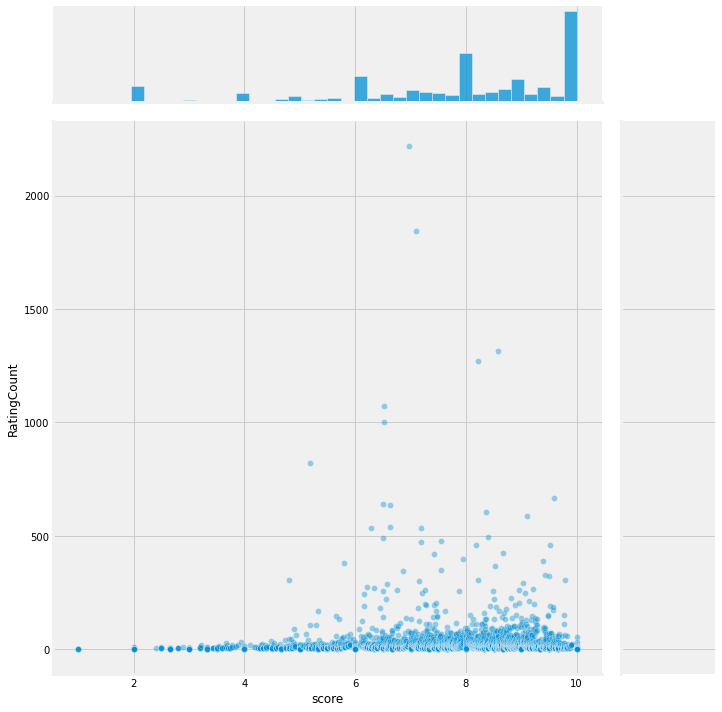

In [46]:
print('Plot of average ratings versus number of ratings'); print('--'*40)
g = sns.jointplot(x = 'score', y = 'RatingCount', data = byRatingUsers, alpha = 0.4, height = 10)

del g, byRatingUsers, popularity_recommender, user_id

#### Popularity Based Recommendation
- For popularity recommendation system, we recommended products based on mean of Ratings given by users. 
- Then we also explored other methods for popularity recommendations. Those were based on: Count of Ratings received for the  product AND Hybrid method for popularity recommendation where in we used both mean and count of rating to decide on the product recommended
- For all of the above cases (recommendations based on mean, count, and mean and count), popularity based method lacks personalization i.e. same recommendations for all users. However, using Popularity based recommendation system it would easier to recommend products to a new user w/o having knowledge about who the users are or what their preferences are and recommending them the products that are in-trend.
- **RMSE of the popularity based recommendation method using mean of rating is 2.9876.**


#### Collaborative Filtering
Objective is to build a recommendation system to recommend products to customers based on their previous ratings for other products i.e. item-based collaborative filtering.

**"You tend to like that item because you've liked those items."**

whereas as we know that in user-based it's "You may like it because your friends liked it".

- Model-based Collaborative Filtering: Singular Value Decomposition and evaluate k-NN based algos.
- Use the filtered ratings dataframe and scipy based SVD to evaluate Item-based collaborative filtering method for suggesting products based to users based on what he has liked in past.
- Also explore user based collaborative filtering.
- Comment on the findings. 



##### Model based Collaborative Filtering: SVD

In [47]:
# Item-based Collaborative Filtering
print('Matrix with one row per \'Product\' and one column per \'User\' for Item-based collaborative filtering'); print('--'*40)
ratings1 = ratings
ratings1 = ratings1.drop_duplicates(subset = 'author')
ratings_item = ratings1.pivot(index = 'author', columns = 'product', values = 'score').fillna(0)
ratings_item

#Output is displayed with unrecognizable characters on output window because the dataframe provided had those entries

Matrix with one row per 'Product' and one column per 'User' for Item-based collaborative filtering
--------------------------------------------------------------------------------


product,?????????????????? ?????????????? SAMSUNG Galaxy Star Plus (S7262) Black,??????????????? Samsung S7262 Star Plus Black,??????????????? Samsung S7262 Star Plus White,APPLE IPHONE 7 PLUS 128GB GOLD,APPLE iPhone 6s 16GB Rose Gold,Apple - Iphone 7 32gb oro,Apple - Smartphone libre iphone 7 128gb negro brillante,"Apple Apple iPhone 7, 32Gb - Rose Gold",Apple IPHONE SE 64 GB SILVER,Apple IPHONE SE 64 GB SPACE GREY,...,iPhone 6S Plus,"iPhone 6s Apple com Tela 4,7â HD com 128GB, 3D Touch, iOS 9, Sensor Touch ID, CÃ¢mera iSight 12MP, Wi-Fi, 4G, GPS, Bluetooth e NFC - Ouro Rosa",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Apple iPhone 6s 64Gb A1688 Gold,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung G935F Galaxy S7 Edge Duos 32Gb Black (SM-G935FZKUSEK),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos Gold (SM-J500HZDDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ APPLE iPhone 6S 64Gb Space Gray,Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Samsung Galaxy S7 Edge 32GB / G935FD (ÑÐµÑÐ½ÑÐ¹),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Samsung Galaxy S8 64Gb,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Apple iPhone 7,×××¤×× ×¡××××¨× Samsung Galaxy S7 Edge SM-G935F 32GB
author,,,,,,,,,,,,,,,,,,,,,
#,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
.,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
????????,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
??????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
????????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
???????????? ????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
???????????? ??????????,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
???????????? ????????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
???????????? ??????????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [48]:
# Calculate the density of the rating matrix
print('Calculate the density of the ratings matrix'); print('--'*40)

print('Shape of ratings matrix: ', ratings_item.shape)

given_num_of_ratings = np.count_nonzero(ratings_item)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = ratings_item.shape[0] * ratings_item.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Calculate the density of the ratings matrix
--------------------------------------------------------------------------------
Shape of ratings matrix:  (712, 317)
given_num_of_ratings =  712
possible_num_of_ratings =  225704
density: 0.32%


In [49]:
# Singular Value Decomposition
U, sigma, Vt = svds(ratings_item, k = 10)
sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_item.columns, index = ratings_item.index) #predicted ratings
preds_df.head()

product,?????????????????? ?????????????? SAMSUNG Galaxy Star Plus (S7262) Black,??????????????? Samsung S7262 Star Plus Black,??????????????? Samsung S7262 Star Plus White,APPLE IPHONE 7 PLUS 128GB GOLD,APPLE iPhone 6s 16GB Rose Gold,Apple - Iphone 7 32gb oro,Apple - Smartphone libre iphone 7 128gb negro brillante,"Apple Apple iPhone 7, 32Gb - Rose Gold",Apple IPHONE SE 64 GB SILVER,Apple IPHONE SE 64 GB SPACE GREY,...,iPhone 6S Plus,"iPhone 6s Apple com Tela 4,7â HD com 128GB, 3D Touch, iOS 9, Sensor Touch ID, CÃ¢mera iSight 12MP, Wi-Fi, 4G, GPS, Bluetooth e NFC - Ouro Rosa",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Apple iPhone 6s 64Gb A1688 Gold,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung G935F Galaxy S7 Edge Duos 32Gb Black (SM-G935FZKUSEK),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos Gold (SM-J500HZDDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ APPLE iPhone 6S 64Gb Space Gray,Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Samsung Galaxy S7 Edge 32GB / G935FD (ÑÐµÑÐ½ÑÐ¹),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Samsung Galaxy S8 64Gb,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Apple iPhone 7,×××¤×× ×¡××××¨× Samsung Galaxy S7 Edge SM-G935F 32GB
author,,,,,,,,,,,,,,,,,,,,,
#,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,...,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
.,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
????????,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
??????????,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
????????????,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00


In [50]:
# Recommend products with highest predicted ratings
print('Creating a function to recommend products with highest predicted ratings'); print('--'*40)
def recommend_items(user_id, ratings_item, preds_df, num_recommendations = 5):
    try:
        print('User has already rated products (from data in training set): {}'.format(train_data.loc[(train_data['author'] == user_id), 'product'].nunique()))
        print('Top 5 products from what\'s already being rated: {}'.format(list(train_data[(train_data['author'] == user_id)].sort_values(by = 'score', ascending = False).head(5)['product'])))
    except:
      print('There\'s no data for the selected user in training set')
    sorted_user_ratings = ratings_item.loc[user_id].sort_values(ascending = False)
    
    sorted_user_predictions = preds_df.loc[user_id].sort_values(ascending = False)
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis = 1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]
    temp = temp.sort_values('user_predictions', ascending = False)
    print('\nTop 5 recommendations for the user based on item-based collaborative filtering method')
    display(temp.head(num_recommendations))
    return temp.head(num_recommendations).index.tolist()

Creating a function to recommend products with highest predicted ratings
--------------------------------------------------------------------------------


In [51]:
print('Get top - K ( K = 5) recommendations.')
print('Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.'); print('--'*40)
result = {}

user_id = "Amazon Customer"
print(f'\nMake recommendation for the user id selected from the testset = "{user_id}"')
result[user_id] = recommend_items(user_id, ratings_item, preds_df)

user_id = "Cliente Amazon"
print(f'\n\nMake recommendation for the user id selected from the testset = "{user_id}"')
result[user_id] = recommend_items(user_id, ratings_item, preds_df)

#Values are showing zero because they are of very small decimal values

Get top - K ( K = 5) recommendations.
Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
--------------------------------------------------------------------------------

Make recommendation for the user id selected from the testset = "Amazon Customer"
User has already rated products (from data in training set): 6234
Top 5 products from what's already being rated: ['Apple iPhone 5c (Blue, 32GB)', 'Apple iPhone 6s 16 GB US Warranty Unlocked Cellphone - Retail Packaging (Rose Gold)', "Samsung Galaxy Note 5, 32GB, (Verizon)(Straight Talk), Gold runs on Straight Talk's $45 unlimited plan via Verizon's 4G LTE Towers", 'HTC 1 X Unlocked GSM Android Smartphone with Beats Audio Sound and Front-Facing Speakers - White', 'ZTE Nubia Z9 Mini (Black, 16GB)']

Top 5 recommendations for the user based on item-based collaborative filtering method


,user_ratings,user_predictions
Recommended Items,,
Samsung Galaxy S7,0.00,0.00
"Samsung Galaxy S7 edge SM-G935F 32GB Smartphone (Unlocked, Blue)",0.00,0.00
Sim Free Samsung Galaxy S7 Edge Mobile Phone - Gold,0.00,0.00
Sim Free Samsung Galaxy S7 Edge Mobile Phone - Black.,0.00,0.00
"Honor 7 Smartphone 4G, Display Full HD 5.2 Pollici, Processore Kirin 935 Octa Core 2.2 GHz, 16 GB Memoria Interna, 3 GB RAM, Fotocamera 20 MP, Grigio",0.00,0.00




Make recommendation for the user id selected from the testset = "Cliente Amazon"
User has already rated products (from data in training set): 2661
Top 5 products from what's already being rated: ["Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 'Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]', 'Lenovo S856 4G Smartphone - 5.5" pollice Android 4.4 MSM8926 Quad Cores 1.2GHz Dual SIM RAM 1GB+8GB ROM Dual Camera 8.0M +1.6M Sbloccato Cellulare WiFi GPS', 'BQ Aquaris E4.5 - Smartphone de 4.5 pulgadas (3G, WiFi 802.11 b/g/n, Bluetooth 4.0 NFC HCE, GPS, 1 GB de RAM, memoria interna de 8 GB), negro y blanco - (Reacondicionado Certificado) por BQ', 'Huawei P8 Lite - Smartphone de 5" (cÃ¡mara 13 MP, 16 GB, HiSilicon Kirin 620 Octa Core 1.2 G

,user_ratings,user_predictions
Recommended Items,,
Samsung Galaxy S7,0.00,0.00
Samsung Galaxy S8 Zwart,0.00,0.00
"Samsung Galaxy S6 edge+ Smartphone 64 GB, Nero [Italia]",0.00,0.00
Samsung Galaxy S7 Edge zwart / 32 GB,0.00,0.00
Samsung Galaxy S7 Edge Factory Unlocked Phone 32 GB International Version (Black Onyx),0.00,0.00


In [52]:
compare_dict['SVD Item-based Collaborative Filtering'] = result

In [53]:
print('Evaluating SVD for Item-based Collaborative Filtering'); print('--'*60)
rmse_df = pd.concat([ratings_item.mean(), preds_df.mean()], axis = 1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
RMSE = round((((rmse_df['Avg_actual_ratings'] - rmse_df['Avg_predicted_ratings']) ** 2).mean() ** 0.5), 4)
print('RMSE OF ITEM BASED COLLABORATIVE FILTERING USING MATRIX FACTORIZATION METHOD (SVD): {}'.format(RMSE))

Evaluating SVD for Item-based Collaborative Filtering
------------------------------------------------------------------------------------------------------------------------
RMSE OF ITEM BASED COLLABORATIVE FILTERING USING MATRIX FACTORIZATION METHOD (SVD): 0.0272


#### Item Based Collaborative Filtering -- SVD
Above we evaluated SVD for item-based collaborative filtering and it can be seen that the RMSE of SVD model 0.0272. 

In [54]:
del (RMSE, U, sigma, Vt, all_user_predicted_ratings, given_num_of_ratings, possible_num_of_ratings, result, rmse_df, 
     density, preds_df, recommend_items, user_id)

###### Product Similarity based on Sklearn Nearest Neighbor

In [55]:
print('Product similarity based on Sklearn Nearest Neighbor'); print('--'*40)
k = 5

ratings2 = ratings
ratings2 = ratings2.drop_duplicates(subset = 'product')

df_knn = ratings2.pivot(index = 'product', columns = 'author', values = 'score').fillna(0)
df_knn_matrix = csr_matrix(df_knn.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = k)
model_knn.fit(df_knn_matrix)

query_item = np.random.choice(df_knn.shape[0])
query_user = np.random.choice(df_knn.shape[1])
distances, indices = model_knn.kneighbors(df_knn.iloc[query_item, :].values.reshape(1, -1), n_neighbors = k+1)

for i in range(0, len(distances.flatten())):
  if i == 0:
    print('Recommendations for {0}:\n'.format(df_knn.index[query_item]))
  else:
    print('{0}: {1}, with distance of {2}:'.format(i, df_knn.index[indices.flatten()[i]], distances.flatten()[i]))

Product similarity based on Sklearn Nearest Neighbor
--------------------------------------------------------------------------------
Recommendations for Blackberry Q10:

1: Sony Xperia Z C6603, with distance of 0.0:
2: Samsung Galaxy Note 3 Neo N7500, with distance of 0.0:
3: Samsung Galaxy S5 16 GB, with distance of 0.0:
4: LG G3 D855 32GB, with distance of 0.0:
5: Nokia 603, with distance of 0.0:


### Model based Collaborative Filtering: k-NN

In [56]:
print('Further reducing the number of users'); 
print('Earlier we had considered users those who rated >=50 products, now to avoid memory issues let\'s take users those who\'ve rated >100 products')
print('--'*40)

ratings_df = ratings_df[ratings_df['AuthorCounts'] > 100]
print(f'Number of rows {ratings_df.shape[0]} and number of columns {ratings_df.shape[1]} in filtered dataframe')
print('Number of unique USERS in further filtered ratings dataframe = ', ratings_df['author'].nunique())
print('Number of unique PRODUCTS in further filteredratings dataframe = ', ratings_df['product'].nunique())

ratings = ratings_df[['author', 'product', 'score']]

Further reducing the number of users
Earlier we had considered users those who rated >=50 products, now to avoid memory issues let's take users those who've rated >100 products
--------------------------------------------------------------------------------
Number of rows 182057 and number of columns 8 in filtered dataframe
Number of unique USERS in further filtered ratings dataframe =  288
Number of unique PRODUCTS in further filteredratings dataframe =  19507


In [57]:
ratings['author'].value_counts().min()

101

In [58]:
train_data, test_data = train_test_split(ratings, test_size = 0.30, random_state = random_state)
display(train_data.shape, test_data.shape)

(127439, 3)

(54618, 3)

In [59]:
print('Getting the trainset and testset ready for recommender to be used'); print('--'*40)
reader = Reader(rating_scale = (0, 5))
data = Dataset.load_from_df(ratings[['author', 'product', 'score']], reader)
trainset = Dataset.load_from_df(train_data[['author', 'product', 'score']], reader); 
testset = Dataset.load_from_df(test_data[['author', 'product', 'score']], reader);

Getting the trainset and testset ready for recommender to be used
--------------------------------------------------------------------------------


In [60]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNBasic algorithm'); print('--'*40)
param_grid_KNNBasic = {'k': [3, 5, 10], 'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]}, 'verbose': [False]}

gs_KNNBasic = GridSearchCV(KNNBasic, param_grid_KNNBasic, measures = ['rmse', 'mae'], cv = 3)
gs_KNNBasic.fit(trainset)
print(gs_KNNBasic.best_score['rmse'])
print(gs_KNNBasic.best_params['rmse'])

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNBasic algorithm
--------------------------------------------------------------------------------
4.001386715737948
{'k': 10, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': False}
Wall time: 5h 50min 11s


In [61]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNWithMeans algorithm'); print('--'*40)
param_grid_KNNWithMeans = {'k': [3, 5, 10], 'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]}, 'verbose': [False]}

gs_KNNWithMeans = GridSearchCV(KNNWithMeans, param_grid_KNNWithMeans, measures = ['rmse', 'mae'], cv = 3)
gs_KNNWithMeans.fit(trainset)
print(gs_KNNWithMeans.best_score['rmse'])
print(gs_KNNWithMeans.best_params['rmse'])

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNWithMeans algorithm
--------------------------------------------------------------------------------
4.036479881479128
{'k': 10, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': False}
Wall time: 18h 16min 39s


In [62]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNWithZScore algorithm'); print('--'*40)
param_grid_KNNWithZScore = {'k': [3, 5, 10], 'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]}, 'verbose': [False]}

gs_KNNWithZScore = GridSearchCV(KNNWithZScore, param_grid_KNNWithZScore, measures = ['rmse', 'mae'], cv = 3)
gs_KNNWithZScore.fit(trainset)
print(gs_KNNWithZScore.best_score['rmse'])
print(gs_KNNWithZScore.best_params['rmse'])

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNWithZScore algorithm
--------------------------------------------------------------------------------
4.046532415060674
{'k': 10, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}, 'verbose': False}
Wall time: 21h 29min 41s


In [63]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNBaseline algorithm'); print('--'*40)
param_grid_KNNBaseline = {'bsl_options': {'method': ['als', 'sgd'], 'reg': [1, 2]}, 'k': [2, 3, 5], 
                          'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]},
                          'verbose': [False]}

gs_KNNBaseline = GridSearchCV(KNNBaseline, param_grid_KNNBaseline, measures = ['rmse', 'mae'], cv = 3)
gs_KNNBaseline.fit(trainset)
print(gs_KNNBaseline.best_score['rmse'])
print(gs_KNNBaseline.best_params['rmse'])

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNBaseline algorithm
--------------------------------------------------------------------------------
4.018964059606679
{'bsl_options': {'method': 'sgd', 'reg': 2}, 'k': 5, 'sim_options': {'name': 'cosine', 'user_based': False}, 'verbose': False}
Wall time: 1d 21h 24min


In [64]:
del param_grid_KNNBasic, param_grid_KNNWithMeans, param_grid_KNNWithZScore, gs_KNNBasic, gs_KNNWithMeans, gs_KNNWithZScore
gc.collect()

44

### Algorithm choosen for Model based (Item) Collaborative Filtering using k-NN inspired method
- Above we evaluated different k-NN inspired algorithms for item-based collaborative filtering. It can be seen that KNNBasic algorithm gives the lowest RMSE of ~4.001.
- k-fold cross-validate KNNBaseline algorithm using the best parameters, to see if there's any improvement in the RMSE. 

In [65]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('2-Fold cross validation using KNNBaseline and with best parameters identified during grid search'); print('--'*40)
kf = KFold(n_splits = 2)
algo = KNNBaseline(**gs_KNNBaseline.best_params['rmse'])
rmse_scores = []

for train_, test_ in kf.split(data):
    algo.fit(train_)
    predictions = algo.test(test_)
    rmse = round(accuracy.rmse(predictions, verbose = True), 4)
    rmse_scores.append(rmse)

    dump.dump('./dump_KNNBaseline_Item', predictions, algo)

print('--'*40)
print(f'RMSE OF ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGORITHM AND 2-FOLD CROSS VALIDATION {round(np.mean(rmse_scores), 4)}')

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
2-Fold cross validation using KNNBaseline and with best parameters identified during grid search
--------------------------------------------------------------------------------
RMSE: 4.0184


MemoryError: Unable to allocate 1.69 GiB for an array with shape (15061, 15061) and data type float64

In [66]:
predictions, algo = dump.load('./dump_KNNBaseline_Item')
df_user = pd.DataFrame(predictions, columns = ['author', 'product', 'ActualRating', 'EstRating', 'Details'])
df_user['Error'] = abs(df_user['EstRating'] - df_user['ActualRating'])
df_user.sort_values('Error', inplace = True, ascending = True)

display(df_user.head())

,author,product,ActualRating,EstRating,Details,Error
59130,ÐÐ¸Ñ Ð°Ð¸Ð»,Lenovo P70 (ÑÐµÐ¼Ð½Ð¾-ÑÐ¸Ð½Ð¸Ð¹),5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00
60638,M,LG G-Flex 2 Platina / 16 GB,5.00,5.00,{'was_impossible': False},0.00
68892,anonieme bezoeker,Samsung S5830 Galaxy ACE zwart,5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00
50757,Michael,Apple iPhone 3GS,5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00
25340,anonieme bezoeker,Samsung S5830 Galaxy ACE zwart,5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00


Actual vs Prediction Comparison
--------------------------------------------------------------------------------


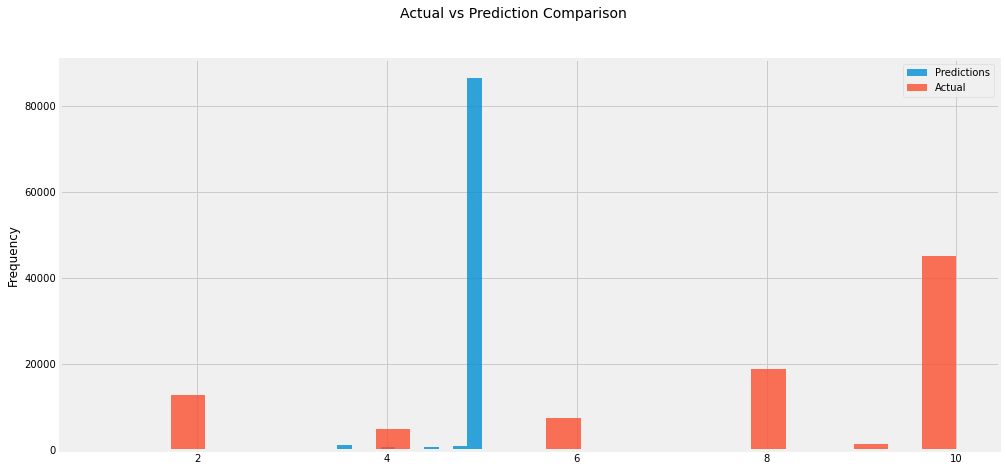

In [67]:
# Actual vs Prediction Comparison
print('Actual vs Prediction Comparison'); print('--'*40)

fig, ax = plt.subplots(figsize = (15, 7.2))
fig.suptitle('Actual vs Prediction Comparison', fontsize = 14)
df_user['EstRating'].plot.hist(bins = 25, alpha = 0.8)
df_user['ActualRating'].plot.hist(bins = 25, alpha = 0.8)
ax.legend(['Predictions', 'Actual'])
plt.show()

In [68]:
# Query top 5 recommendations for specific UserID
print('Get top - K ( K = 5) recommendations.')
print('Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.'); print('--'*40)
result = {}

def query_user(user_id):
  try:
    print('User "{}" has already rated products (from data in training set): {}'.format(user_id, train_data.loc[(train_data['author'] == user_id), 'product'].nunique()))
    print('Top 5 products from what\'s already being rated: {}'.format(list(train_data[(train_data['author'] == user_id)].sort_values(by = 'score', ascending = False).head(5)['product'])))
  except:
    print('There\'s no data for the selected user in training set')
  print('Top 5 recommendations for the user are: {}'.format(list(df_user[(df_user['author'] == user_id)].sort_values(by = 'EstRating', ascending = False).head(5)['product'])))
  return list(df_user[(df_user['author'] == user_id)].sort_values(by = 'EstRating', ascending = False).head(5)['product'])

# For e.g. querying for the following user
print('A check on what has the user liked in past (based on data available in training set, if there is) and making recommendations');
print('--'*40, '\n')

result['Amazon Customer'] = query_user('Amazon Customer')
print('\n')
result['Cliente Amazon'] = query_user('Cliente Amazon')

Get top - K ( K = 5) recommendations.
Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
--------------------------------------------------------------------------------
A check on what has the user liked in past (based on data available in training set, if there is) and making recommendations
-------------------------------------------------------------------------------- 

User "Amazon Customer" has already rated products (from data in training set): 6175
Top 5 products from what's already being rated: ['Sony Xperia XZ F8332 64GB 5.2-Inch 23MP 4G LTE Dual SIM FACTORY UNLOCKED International Stock No Warranty (FOREST BLUE)', 'OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)', 'Samsung Galaxy Note 3 Neo N7505 16GB Unlocked GSM 4G LTE Hexa-Core Smartphone w/ S Pen stylus - White', 'Apple iPhone 7 (Rose Gold, 128GB)', 'Asus Zenfone 2 Laser ZE550KL ( White ,2GB Ram, 16GB )']
Top 5 recommendations for the user are: ['OnePlus 3 (G

In [69]:
compare_dict['k-NN Item-based Collaborative Filtering'] = result
display(compare_dict)

{'PopularityRec': {'Amazon Customer': ['Wiko Highway Smartphone USB Android 4.2.2 Jelly Bean 16 Go Violet',
   'Apple iPhone 5S 64 GB',
   'Samsung I9505 Galaxy S4 Black Edition 16GB (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)',
   'Celular Desbloqueado LG Optimus L3 II E425 Preto com Tela de 3,2â\x80\x9d, Android 4.1, CÃ¢mera 3MP, 3G, Wi-Fi, RÃ¡dio FM/MP3 e Bluetooth - Claro',
   'Apple iPhone 6s Plus 64 GB'],
  'Cliente Amazon': ['Wiko Highway Smartphone USB Android 4.2.2 Jelly Bean 16 Go Violet',
   'Apple iPhone 5S 64 GB',
   'Samsung I9505 Galaxy S4 Black Edition 16GB (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)',
   'Celular Desbloqueado LG Optimus L3 II E425 Preto com Tela de 3,2â\x80\x9d, Android 4.1, CÃ¢mera 3MP, 3G, Wi-Fi, RÃ¡dio FM/MP3 e Bluetooth - Claro',
   'Apple iPhone 6s Plus 64 GB']},
 'SVD Item-based Collaborative Filtering': {'Amazon Customer': ['Samsung Galaxy S7',
   'Samsung Galaxy S7 edge SM-G935F 32GB Smartphone (Unlocked, Blue)',
   'Sim Free Samsung Galaxy S7 Edge Mobile Phone - Gold',
   'Sim Free 

In [70]:
df_user.head()

,author,product,ActualRating,EstRating,Details,Error
59130,ÐÐ¸Ñ Ð°Ð¸Ð»,Lenovo P70 (ÑÐµÐ¼Ð½Ð¾-ÑÐ¸Ð½Ð¸Ð¹),5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00
60638,M,LG G-Flex 2 Platina / 16 GB,5.00,5.00,{'was_impossible': False},0.00
68892,anonieme bezoeker,Samsung S5830 Galaxy ACE zwart,5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00
50757,Michael,Apple iPhone 3GS,5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00
25340,anonieme bezoeker,Samsung S5830 Galaxy ACE zwart,5.00,5.00,"{'actual_k': 5, 'was_impossible': False}",0.00


In [71]:
del (algo, ax, fig, gs_KNNBaseline, kf, param_grid_KNNBaseline, predictions, rmse, rmse_scores, train_, test_)

### Item based Collaborative Filtering (k-NN)
Using k-NN inspired algos for item based collaborative filtering and 2-Fold cross validation, we get a RMSE score of ~0.9655.

In [72]:
%%time
print('USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNBaseline algorithm'); print('--'*40)
param_grid_KNNBaseline = {'bsl_options': {'method': ['als', 'sgd'], 'reg': [1, 2]}, 'k': [2, 3, 5], 
                          'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [True]},
                          'verbose': [False]}

gs_KNNBaseline = GridSearchCV(KNNBaseline, param_grid_KNNBaseline, measures = ['rmse', 'mae'], cv = 3)
gs_KNNBaseline.fit(trainset)
print(gs_KNNBaseline.best_score['rmse'])
print(gs_KNNBaseline.best_params['rmse'])

USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNBaseline algorithm
--------------------------------------------------------------------------------
4.056143398238916
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}, 'verbose': False}
Wall time: 9min 6s


In [73]:
%%time
print('USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('2-Fold cross validation using KNNBaseline and with best parameters identified during grid search'); print('--'*40)
kf = KFold(n_splits = 2)
algo = KNNBaseline(**gs_KNNBaseline.best_params['rmse'])
rmse_scores = []

for train_, test_ in kf.split(data):
    algo.fit(train_)
    predictions = algo.test(test_)
    rmse = round(accuracy.rmse(predictions, verbose = True), 4)
    rmse_scores.append(rmse)

    dump.dump('./dump_KNNBaseline_User', predictions, algo)

print('--'*40)
print(f'RMSE OF USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGORITHM AND 2-FOLD CROSS VALIDATION {round(np.mean(rmse_scores), 4)}')

USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
2-Fold cross validation using KNNBaseline and with best parameters identified during grid search
--------------------------------------------------------------------------------
RMSE: 4.0450
RMSE: 4.0468
--------------------------------------------------------------------------------
RMSE OF USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGORITHM AND 2-FOLD CROSS VALIDATION 4.0459
Wall time: 29.8 s


In [74]:
predictions, algo = dump.load('./dump_KNNBaseline_User')
df_user = pd.DataFrame(predictions, columns = ['author', 'product', 'ActualRating', 'EstRating', 'Details'])
df_user['Error'] = abs(df_user['EstRating'] - df_user['ActualRating'])
df_user.sort_values('Error', inplace = True, ascending = True)

display(df_user.head())

,author,product,ActualRating,EstRating,Details,Error
10861,Amazon Customer,Samsung Galaxy SIII Mini UK SIM-Free Smartphon...,4.00,4.00,"{'actual_k': 5, 'was_impossible': False}",0.00
46854,Client d'Amazon,Samsung Chargeur Original Samsung 2A ETAU90EWE...,2.00,2.00,"{'actual_k': 1, 'was_impossible': False}",0.00
46843,Amazon Customer,"Sony Xperia M2 (Black, 8GB)",4.00,4.00,"{'actual_k': 3, 'was_impossible': False}",0.00
13928,Amazon Kunde,"Samsung Galaxy S5 Smartphone (12,95 cm (5,1 Zo...",4.00,4.00,"{'actual_k': 5, 'was_impossible': False}",0.00
5268,Amazon Customer,Samsung Note 4 Standard Li-ion Battery 3220mAh...,4.00,4.00,"{'actual_k': 5, 'was_impossible': False}",0.00


In [75]:
print('A check on what has the user liked in past (based on data available in training set, if there is) and making recommendations');
print('--'*40, '\n')
result = {}

result['Amazon Customer'] = query_user('Amazon Customer')
print('\n')
result['Cliente Amazon'] = query_user('Cliente Amazon')

A check on what has the user liked in past (based on data available in training set, if there is) and making recommendations
-------------------------------------------------------------------------------- 

User "Amazon Customer" has already rated products (from data in training set): 6175
Top 5 products from what's already being rated: ['Sony Xperia XZ F8332 64GB 5.2-Inch 23MP 4G LTE Dual SIM FACTORY UNLOCKED International Stock No Warranty (FOREST BLUE)', 'OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)', 'Samsung Galaxy Note 3 Neo N7505 16GB Unlocked GSM 4G LTE Hexa-Core Smartphone w/ S Pen stylus - White', 'Apple iPhone 7 (Rose Gold, 128GB)', 'Asus Zenfone 2 Laser ZE550KL ( White ,2GB Ram, 16GB )']
Top 5 recommendations for the user are: ['Samsung Galaxy S7 Edge SM-G935F Smart Phone 32 GB, Gold Platinum', 'OnePlus X (Onyx, 16GB)', 'Honor 6X (Silver, 32GB)', 'Motorola Moto Z Play with Style Mod (Black, 32GB)', 'Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Spa

In [76]:
compare_dict['k-NN User-based Collaborative Filtering'] = result
display(compare_dict)

{'PopularityRec': {'Amazon Customer': ['Wiko Highway Smartphone USB Android 4.2.2 Jelly Bean 16 Go Violet',
   'Apple iPhone 5S 64 GB',
   'Samsung I9505 Galaxy S4 Black Edition 16GB (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)',
   'Celular Desbloqueado LG Optimus L3 II E425 Preto com Tela de 3,2â\x80\x9d, Android 4.1, CÃ¢mera 3MP, 3G, Wi-Fi, RÃ¡dio FM/MP3 e Bluetooth - Claro',
   'Apple iPhone 6s Plus 64 GB'],
  'Cliente Amazon': ['Wiko Highway Smartphone USB Android 4.2.2 Jelly Bean 16 Go Violet',
   'Apple iPhone 5S 64 GB',
   'Samsung I9505 Galaxy S4 Black Edition 16GB (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)',
   'Celular Desbloqueado LG Optimus L3 II E425 Preto com Tela de 3,2â\x80\x9d, Android 4.1, CÃ¢mera 3MP, 3G, Wi-Fi, RÃ¡dio FM/MP3 e Bluetooth - Claro',
   'Apple iPhone 6s Plus 64 GB']},
 'SVD Item-based Collaborative Filtering': {'Amazon Customer': ['Samsung Galaxy S7',
   'Samsung Galaxy S7 edge SM-G935F 32GB Smartphone (Unlocked, Blue)',
   'Sim Free Samsung Galaxy S7 Edge Mobile Phone - Gold',
   'Sim Free 

### User based Collaborative Filtering (k-NN)
Using k-NN inspired algos for user based collaborative filtering and 2-Fold cross validation, we get a RMSE score of ~4.0826. 

# Conclusion
- Non-personalized based recommendation system (such as popularity) is generated by averaging the recommendations for all the users. Here we recommended top 5 products to the users. Also saw how we can make use of count to suggest popular products to the users and hybrid popularity based recommender based on a combination of mean and count. However in popularity based recommendation, all users receive same recommendations. RMSE of popularity recommendation method based on mean of ratings was 2.9876.

- Collaborative-based recommendations are personalized since the rating "prediction" differs depending on the target user and it is based on
1. User-to-user: ratings for a given product expressed by users that are similar to the active user.
2. Item-to-item: weighted average of the ratings of the active users for the similar items.

- Collaborative based filtering method requires a minimal knowledge engineering efforts when compared to methods such as content-based recsys. This method is based on user history, but what if the user is new (where there is no user history)? It's one of the limitations of the method known as cold-start problem.

- Items with lots of history gets recommended a lot, while those without never make it into the recommendation engine.

- Since our goal was to build a recsys to recommend products to customers based on their previous ratings for other products, we built an item-based collaborative filtering recommendation system. Used two model-based approaches to do that: SVD and k-NN inspired algos.

- We saw that SVD had a RMSE score of 4.0033. We also compared various k-NN based algorithms using grid search method and found that KNN Baseline algo gave the lowest RMSE, we then used 2-fold cross validation technique which gave a RMSE of 4.0826.

- Also explored kNN Baseline algo for user-based collaborative filtering, RMSE (4.04) was slightly higher than item-based CF.

### Recommender System Questions (Prompts 11, 12, 13)
### 11. In what business scenario you should use popularity based Recommendation Systems?
It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.
For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that. 

**Merits of popularity based recommendation system**
 - It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.
 - There is no need for the user's historical data.

**Demerits of popularity based recommendation system**
 - Not personalized 
 - The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.

*Example*
Ideal Business Scenario: Website, or site where no information about user is recorded and recommendations need to be displayed.
 - Google News: News filtered by trending and most popular news.
 - YouTube: Trending videos.


>


### 12. In what business scenario you should use CF based Recommendation Systems ?
It is considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations. The similarity is not restricted to the taste of the user moreover there can be consideration of similarity between different items also. The system will give more efficient recommendations if we have a large volume of information about users and items.

Mainly, there are two approaches used in collaborative filtering stated below:

1. **User-based nearest-neighbor collaborative filtering**
 
User-user collaborative filtering where there are three users A, B and C respectively and their interest in fruit. The system finds out the users who have the same sort of taste of purchasing products and similarity between users is computed based upon the purchase behavior. User A and User C are similar because they have purchased similar products.

In this, the user vector includes all the items purchased by the user and rating given for each particular product. The similarity is calculated between users using an n*n matrix in which n is the number of users present. The similarity is calculated using the same cosine similarity formula. Now, the recommending matrix is calculated. In this, the rating is multiplied by the similarity between the users who have bought this item and the user to which item has to be recommended. This value is calculated for all items that are new for that user and are sorted in descending order. Then the top items are recommended to that user.
If a new user comes or old user changes his or her rating or provides new ratings then the recommendations may change.

2. **Item-based nearest-neighbor collaborative filtering**
 
Imagine user X, Y, and Z respectively. The system checks the items that are similar to the items the user bought. The similarity between different items is computed based on the items and not the users for the prediction. Users X and Y both purchased items A and B so they are found to have similar tastes.

In this, rather than considering similar users, similar items are considered. If the user ‘A’ loves ‘Inception’ he may like ‘The Martian’ as the lead actor is similar. Here, the recommendation matrix is m*m matrix where m is the number of items present.


##### Advantages:

- New products can be introduced to the user.
- Business can be expanded and can popularise new products.


##### Disadvantages:
- Enough users required to find a match. To overcome such cold start problems, often hybrid approaches are made use of between CF and Content-based matching.

- Even if there are many users and many items that are to be recommended often, problems can arise of user and rating matrix to be sparse and will become challenging to find out about the users who have rated the same item.

- The problem in recommending items to the user due to sparsity problems.


3. **Singular value decomposition and matrix-factorization**

Singular value decomposition also known as the SVD algorithm is used as a collaborative filtering method in recommendation systems. SVD is a matrix factorization method that is used to reduce the features in the data by reducing the dimensions from N to K where (K<N). 

For the part of the recommendation, the only part which is taken care of is matrix factorization that is done the user-item rating matrix. Matrix-factorization is all about taking 2 matrices whose product is the original matrix. Vectors are used to represent item ‘qi’ and user ‘pu’ such that their dot product is the expected rating. ‘qi’ and ‘pu’ can be calculated in such a way that the square error difference between the dot product of user and item and the original ratings in the user-item matrix is least.



> 



### 13. What other possible methods can you think of which can further improve the recommendation for different users ?
Recommendation systems with machine learning use users’ behavioral, historical purchase, interest, and activity data to predict preferable items to buy. As a business, personalized recommendations can achieve greater customer engagement and consumption rates while boosting ROI significantly. As McKinsey reports, personalizing leaders such as Amazon, Netflix, etc. are generating a 15 to 35% increase in revenues through product recommendations.

In addition to higher revenues, here are some other long-term advantages of powering your business offerings with recommendation engines-

a) Attracts more traffic

b) Engages shoppers through diversity

c) Increases customer satisfaction and retention

d) Boosts conversion rates

e) Augments upselling and cross-selling efforts

f) Raises average order value and purchases, and more.


#### 4 Other Types of Recommendation Systems:

- **Content-based Filtering**
The second most popular recommendation system, content-based filtering takes items bought as input data to recommend similar items. Recommendations are specific to every user under content-based filtering, therefore, can scale to a large user base. Such recommendations are often found across eCommerce portals, video streaming apps, and digital libraries under the “Similar products” or “Recommended items” tags.
Amazon is a stark example of content-based filtering, though Google Play Store and Flipkart are also leading the game with content-based filtering. 

- **Personalized Video Ranker**
he Personalized Video Ranker (PVR) algorithm stems from the crucial need for OTT (Over-the-top) services to nail user preferences. The extraordinary boom in digital content production and demand has led Netflix to develop a highly unique and effective recommendation system.
Supervised and unsupervised machine learning algorithms enable Netflix to strikes the right balance between personalized and non-personalized content recommendations. 
The PVR algorithms take the best matches from the entire catalog of databases for each user in a personalized way. It powers the top-most “Genre rows” on the Netflix homepage. PVR lists are followed by the “Top N” ranker that adds recommendations to the “Top Picks” row. It combines personalized filtering with the highest-ranked web series.

- **Candidate Generation Network**
The candidate generation network deploys deep neural networks to analyze every user’s history including likes, comments, and most-consumed digital content, etc. Resultant, it predicts future user preferences with precision and relevance using Google Brain’s TensorFlow to train DNNs. Coupled with a ranking network, the candidate generation network extracts richer features for each content to rank the recommendations. YouTube is one of the personalizing and digital media content leaders that deploys candidate generation network to engage its users.

- **Knowledge-based Recommender systems**
Knowledge-based engines are some of the earliest know recommender systems backed by a rich variety, velocity, and variation of datasets. They capture digitally stored knowledge in a company’s backend to match specific user queries by decoding its intents, context, and entities. This kind of recommendation system with machine learning extracts a company’s domain knowledge that is governed by ‘if-this-then-that’ rules. The USP of a knowledge-based recommendation system is that it can be constantly improved not by the user’s history but its interaction with the system. This can happen through the underlying ‘critique method’ that enables users to assign feedback to recommendations for improving search results.

# ---------------------------- END OF PROJECT --------------------------------------